### Example notebook - differential gene expression for different cancer types

This notebook demonstrates reading from API and performing analysis of differential gene expression.
- title: "DGE - Cancer Types"
- author: "Margaret Paiva"
- date: "21/10/2021"
- output: R notebook

### 1. Dependencies

In [10]:
# cran packages
x <- c('jsonlite',
       'rjson',
       'httr',   
       'dplyr', 
       'data.table', 
       'parallel', 
       'DBI', 
       'DT', 
       'tidyr', 
       'tibble', 
       'ggplot2')
# bioconductor packages
y <- c('limma', 
       'fgsea')

In [11]:
# install cran packages
for (pkg in x) {
    if (!pkg %in% rownames(installed.packages())) {install.packages(pkg)}
}

In [12]:
# install bioconductor packages
if (!requireNamespace("BiocManager", quietly=TRUE))
    install.packages("BiocManager")
for (pkg in y) {
    if (!requireNamespace(pkg, quietly=TRUE)) {
        BiocManager::install(pkg)
    }
}

In [13]:
# load packages
load_lib <- function(x) {
    suppressPackageStartupMessages(library(x, character.only = TRUE))
}
invisible(lapply(c(x, y), load_lib))

### 2. Request data from API

Request data from API using the files at https://github.com/Champions-Oncology/Workspaces/tree/main/1starter_data_request.

This notebook used the following options to request data: 

(This notebook used [this example list of genes](https://github.com/Champions-Oncology/Workspaces/blob/main/gene_list.csv). You may define your genes of interest in a .csv file and use it in the data requesting file.)
- table="expression",
- cancer_type=["Renal cell carcinoma", "Prostate", "Adenoid cystic carcinoma", "Breast", "Thyroid", "Testicular", "Hepatocellular carcinoma", "Melanoma"],
- genes=list(genes_df['gene']),
- source = "PDX"

(For example, if you use the data_request.ipynb in Python, these are the options in the `df, location = request_data()` function.)

### 3. Read data

In [19]:
# Create a dataframe from the data
df  <- fread("../data/pdx_expression_gene_list_multi_cancer.csv")  # change to where you saved your .csv file and file name
df$tumor_type  <- as.character(df$tumor_type)
df$z  <- as.numeric(df$z)
head(df, 2)
print(dim(df))

gene,model,model_name,log.tpm,z,fold,tumor_type
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
ACSM3,CTG-3501,CTG-3501,2.7411490,-0.1693172,0.8765697,Breast
COPZ2,CTG-3501,CTG-3501,0.7995996,-0.9946150,0.1851744,Breast


[1] 82800     7


### 4. Define the gene of interest

In [20]:
# Define a gene of interest
# Make sure the gene you select exist in the above df table
gene_choice <- 'ACSM3' # put your gene of interest here
df_gene  <- df %>% 
    na.omit()  %>% 
    filter(gene==gene_choice)  
head(df_gene, 2)

gene,model,model_name,log.tpm,z,fold,tumor_type
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
ACSM3,CTG-3501,CTG-3501,2.741149,-0.1693172,0.8765697,Breast
ACSM3,CTG-0718,CTG-0718,3.214430,0.1442849,1.1051820,Melanoma


### 5. Visualization

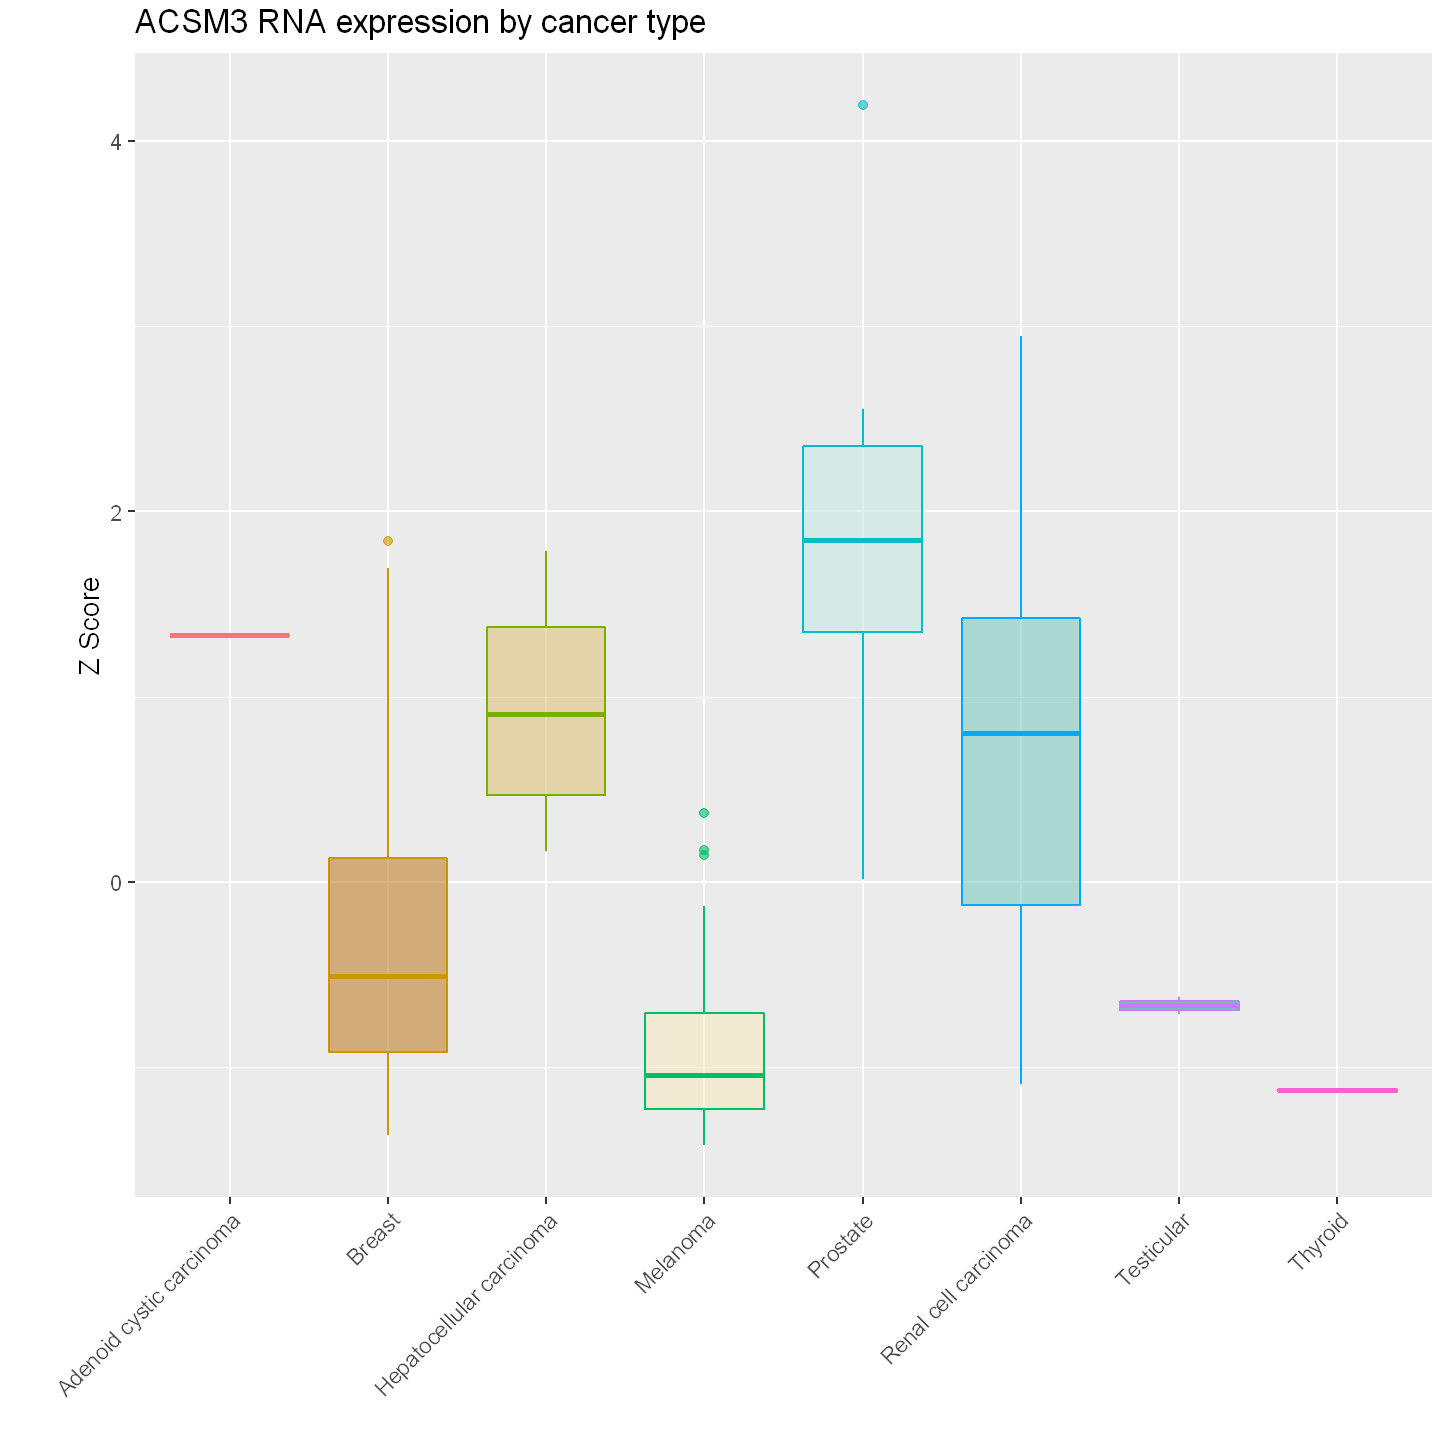

In [23]:
# Visualize the expression levels by cancer type
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=180) # set figure size and resolution
ggplot(df_gene, aes(x=tumor_type, y=z, fill=tumor_type, color=tumor_type)) +
    geom_boxplot(alpha=0.6) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          legend.position = "none", 
          plot.margin = unit(c(0,0,0,1)+0.1, "cm")) +
    labs(x="", y="Z Score", 
         title=paste0(gene_choice, " RNA expression by cancer type")) +
    scale_fill_brewer(palette="BrBG")